# Artificial Neural Networks Approach to Track a Breast Cancer Tumor Evolution using Antenna 

# Creating a Multi-output Regersor with Keras  (Artificial Neural Network, ANN) Breast_Cancer_1 

Roadmap 

we should draw up a quick roadmap before we start programming to keep us on course. Once we have a problem and model in mind, the following phases serve as the foundation for any machine learning approach:
1.	Ask the question and select the necessary information

2.	Setting up the environment so that each model's code can be written. Import the Skill-Learn and Keras libraries, respectively, for random forest and neural networks.Identify and correct missing data points/anomalies as required

3.	Get the information ready for the machine learning model.

4.	Use the training data to train the model.

5.	Make predictions on the test data

6.	Calculate performance metrics and compare forecasts to the targets in the known test set.

7.	If performance is subpar, modify the model, get new data, or attempt a different modeling approach.

8.	Interpret model and report results visually and numerically
Step 1 has already been completed! Can we forecast the tumor size and location? is what we're asking. And the datasets were extracted in order to achieve this purpose, as was described in the second chapter in doc.

__Practically speaking, the machine learning process starts with gathering data for estimating the size and location of a malignant tumour in three-axis ( Tx , Ty, and Tz). As previously mentioned, this data will be extracted from electromagnetic waves received by a receiving antenna (located outside the breast), as the data includes electrical measured quantities like (Transmitted power, Gain, Radiation Efficiency)__. 

discrbtion of the dataset :
-	Transmitted power: The amplitude, intensity, or total power of a transmitted wave in relation to an incident wave is described by a transmission coefficient.

-	-Gain: The gain of a receiving antenna indicates how effectively the antenna transforms radio waves coming from a specific direction into electrical power.

-	-Radiation Efficiency: In a receiving antenna, it refers to the percentage of the radio wave's power that is actually supplied as an electrical signal after being intercepted by the antenna.


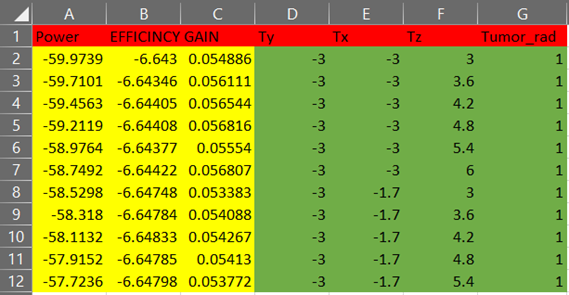

__In order to evaluate the project and to generalize its credibility, in this section, the artificial neural network (ANN) was presented as another model to test the first dataset Breast_Cancer_1 . The neural network based on deep learning participates in a number of analytical steps used in Random Forest, such as the method of reading data, exploring it, sorting it into inputs and outputs, and splitting it into data training and testing so there is no need to repeat these steps__

# Import

 the first step is importing all the Python dependencies that we need. We will use four packages: 
 
1- Pandas and Numpy for read the dataset and handling with dataset
 
2- sklearn, primarily for data preprocessing related activities, and tensorflow, for the Neural network. From sklearn, we import train_test_split - allowing us to split the data into a training and testing dataset, and for scaling the data. In addation, sklearn provide a different performance measurments methods such as mean_squared_error and R^2 (sm). From tensorflow, we will use the Sequential API for constructing our Neural Network, using Dense (i.e. densely-connected) layers. For visualizing , from matplotlib will use plot function in order to plot the val_loss and train_loss curves to evaluate the performance. We use Mean squared error for computing loss and Adam for optimization.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm

1- Importing , Explore the Datasets, Identify Anomalies, Missing Data, Features and Targets and Convert Data to Arrays : all of these steps have been done and presented in the random forest mode.

2- use the data.info() and data.head() to give a full detail about the type of datasets used and to give a broad overview of its size in terms of the number of features and samples

3- It can be seen from the info function print it consists of three features ( power, EFFICINCY, GAIN) and 973 samples, while there is four output targets (Tx, Ty,and Tz) , and this proves our claim. Also we have 973 rows and 7 cloumn

In [12]:
data = pd.read_csv('Breast_Cancer_1.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Power      973 non-null    float64
 1   EFFICINCY  973 non-null    float64
 2   GAIN       973 non-null    float64
 3   Ty         973 non-null    float64
 4   Tx         973 non-null    float64
 5   Tz         973 non-null    float64
 6   Tumor_rad  973 non-null    float64
dtypes: float64(7)
memory usage: 53.3 KB


In [14]:
data.head()

,Power,EFFICINCY,GAIN,Ty,Tx,Tz,Tumor_rad
0,-59.973928,-6.643001,0.054886,-3.0,-3.0,3.0,1.0
1,-59.710135,-6.643465,0.056111,-3.0,-3.0,3.6,1.0
2,-59.456334,-6.644046,0.056544,-3.0,-3.0,4.2,1.0
3,-59.211927,-6.644083,0.056816,-3.0,-3.0,4.8,1.0
4,-58.976370,-6.643765,0.055540,-3.0,-3.0,5.4,1.0


In [15]:
print(data.duplicated().sum(0))


0


In [16]:
print(data.isnull().sum(0))

Power        0
EFFICINCY    0
GAIN         0
Ty           0
Tx           0
Tz           0
Tumor_rad    0
dtype: int64


Furthermore, by closely looking at the results, all of the data points are floats, so there is no categorical data and, therefore, no need to use one of the encoder methods.

# Features and Targets Selection

1- Now, it need to separate the data into the features and targets 

2-The target, also known as the label, is the value we want to predict, in this case the actual tumor size\radius (Tumor_rad) and its location in three coordinates (Tx, Ty,and Tz) , the last four

3- the features are all the rows and the first three cloumns the model uses to make a prediction From 0 to 3

In [17]:
# Features ( Input)
X = data.iloc[:,0:3]
print(X)

         Power  EFFICINCY      GAIN
0   -59.973928  -6.643001  0.054886
1   -59.710135  -6.643465  0.056111
2   -59.456334  -6.644046  0.056544
3   -59.211927  -6.644083  0.056816
4   -58.976370  -6.643765  0.055540
..         ...        ...       ...
968 -54.449500  -6.319471  0.056191
969 -54.317238  -6.320063  0.058205
970 -54.188383  -6.345608  0.058338
971 -54.062831  -6.344545  0.060655
972 -53.940484  -6.344943  0.060586

[973 rows x 3 columns]


In [18]:
# Targets (Output)
y = data.iloc[:,3:7]
print(y)

      Ty   Tx   Tz  Tumor_rad
0   -3.0 -3.0  3.0        1.0
1   -3.0 -3.0  3.6        1.0
2   -3.0 -3.0  4.2        1.0
3   -3.0 -3.0  4.8        1.0
4   -3.0 -3.0  5.4        1.0
..   ...  ...  ...        ...
968 -0.4  3.0  5.4        2.2
969 -0.4  3.0  6.0        2.2
970  0.9 -3.0  3.0        2.2
971  0.9 -3.0  3.6        2.2
972  0.9 -3.0  4.2        2.2

[973 rows x 4 columns]


# Convert Data to Arrays

We will also convert the Pandas data frames to Numpy arrays because that is the way the algorithm works using value

In [19]:
X = data.iloc[:,0:3].values
y = data.iloc[:,3:7].values

# Data Scaling 

The scaling step is one of the most important steps in creating neural networks, where the creation of weights for entries depends largely on scaling . To this end, and after selecting the features and targets, we scale them to a range between (-1 and 1), using StandardScaler and fit it .By doing so, the overall datasets are scaled 

In [20]:
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-2.08569255 -0.49072703 -0.12913767]
 [-2.03418036 -0.49137997  0.28193458]
 [-1.98461955 -0.49219862  0.42718439]
 ...
 [-0.95592213 -0.07169106  1.02865341]
 [-0.93140491 -0.07019326  1.80575663]
 [-0.90751361 -0.07075377  1.78278254]]


# Train/test split

Sklearn allows you to manually specify the dataset to use for validation\testing during training. After generating the dataset, we must create a split between training and testing data. Scikit-learn also provides a nice function for this: train_test_split. Since both datasets are small, so in this project we convert X and y into its training and testing components with a 90/10 train/test split -It is worth noting that the random state here is one of the optimization elements that can be changed randomly depending on achieving good performance of the model. According to the public domain, Random State is determined to 0

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state =0)

# Prepare the Neural Network Architecture: 

1- The next step here is creating the model using an instance of the Sequential API. Using model.add, we then stack multiple densely-connected (Dense) layers on top. Recall from the above that in a Dense layer, each neuron in a layer connects to all the other neurons in the previous layer. This means that they will become aware of certain patterns in any of the upstream neurons, if they fire.

2- The Input layer has the argument “input_dim” as an input dimensions, as the shape must equal the input data. As mentioned before, we has three features, then the value of input_dim is equal to 3.

3- The hidden layers : The three-inputs of the first dataset  here are pass through four hidden layers, which were chosen after some trial and error . Our Dense layers will become has a narrower neurons when we get closer to the output layer. This allows us to detect many patterns therefore the performance of the model will increase . If you wonder how I got to the number of neurons in the hidden layers, I conducted several experiments and found that this number leads to good results in terms of the error and accuracy. Therefore, the first , second , third, and forth are designed with 128, 64,32, and 16 neurons respectively . As is common, we use ReLU as an activations function

4- The output layer: In our project we have a multi-output regresor , a task that has four output variables (the size of the malignant tumor, and its location in the three axis) will require a regresor neural network output layer with four nodes in the output layer, each with the linear (default) activation function. Therefore, the argument “n_output” is defined as an output dimensions, as the value of this argument equal to 4. 


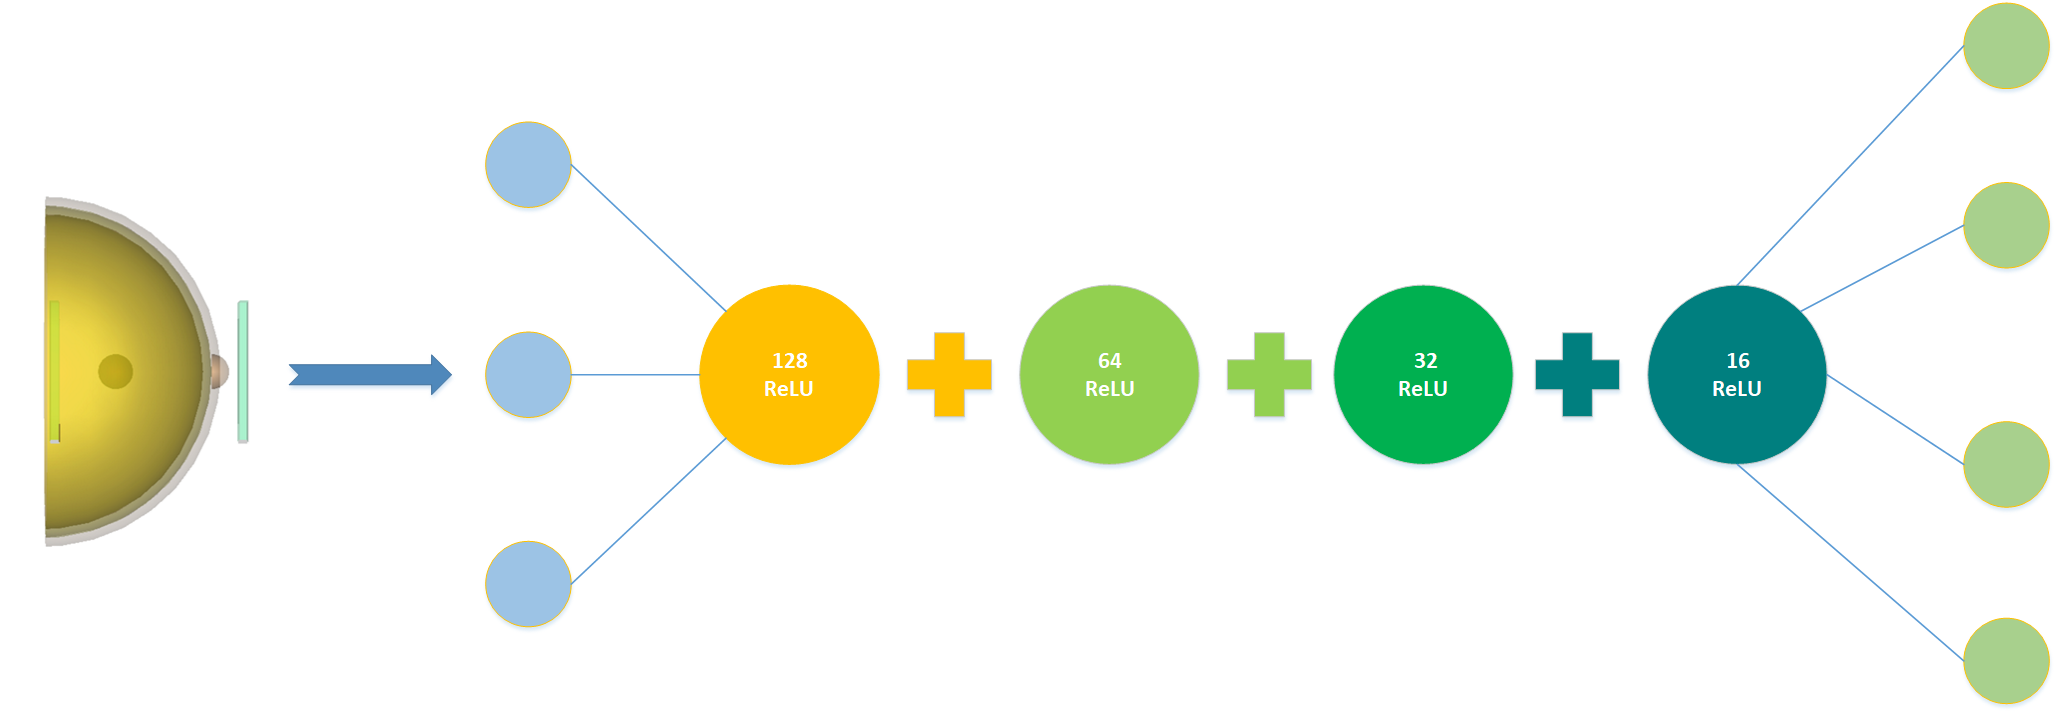

In [40]:
n_outputs=4
model = Sequential() 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=125, input_dim=3, activation='relu'))
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=64, activation='relu'))
# Defining the Therd layer of the model
model.add(Dense(units=32, activation='relu'))
# Defining the Forth layer of the model
model.add(Dense(units=16,activation='relu'))  
# The output neurons are a four-fully connected node 
model.add(Dense(n_outputs)) 

# Compiling the model: 

We then convert the model  selection  that we have just created into a true model. Using mean squared error (MSE) as loss function (which can be used in effectively the number of multi-output regression tasks) and the Adam optimizer, we instantiate the model

In [41]:
model.compile(loss='mse', optimizer='adam')

# Training the model

We then fit the training data to the model and provide a few configuration options defined earlier. The model will now start training

In [42]:
history = model.fit(X_train, Y_train, epochs=2000, batch_size=20, validation_data=(X_test, Y_test))

Epoch 1/2000
44/44 [==============================] - 1s 4ms/step - loss: 6.6033 - val_loss: 3.9073
Epoch 2/2000
44/44 [==============================] - 0s 2ms/step - loss: 3.2406 - val_loss: 2.7263
Epoch 3/2000
44/44 [==============================] - 0s 2ms/step - loss: 2.6649 - val_loss: 2.5139
Epoch 4/2000
44/44 [==============================] - 0s 2ms/step - loss: 2.4905 - val_loss: 2.4224
Epoch 5/2000
44/44 [==============================] - 0s 2ms/step - loss: 2.3938 - val_loss: 2.3796
Epoch 6/2000
44/44 [==============================] - 0s 2ms/step - loss: 2.3468 - val_loss: 2.2946
Epoch 7/2000
44/44 [==============================] - 0s 2ms/step - loss: 2.3056 - val_loss: 2.3153
Epoch 8/2000
44/44 [==============================] - 0s 2ms/step - loss: 2.2838 - val_loss: 2.3368
Epoch 9/2000
44/44 [==============================] - 0s 2ms/step - loss: 2.2856 - val_loss: 2.3246
Epoch 10/2000
44/44 [==============================] - 0s 2ms/step - loss: 2.2585 - val_loss: 2.2529

# Evaluating the model

After the model is trained, we can evaluate it using model. Predict. Based on the testing dataset, we then know how well it performs when it is used on data that it has never seen before

In [43]:
Y_pred= model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


#  Model Performance Measurement

As mentioned before, Testing When you have your model trained and tuned, it is time to test its final performance. So you can use all the regression metrics to assess its result. For example, you might use MAE, MSE, MASE, RMSE, MAPE, SMAPE, and others. However, from my experience, MAE and MSE are the most commonly used. Both of them will be a good fit to evaluate the model’s performance. So, if you use them, keep in mind that the less is your error, the better and the error of the perfect model will be equal to zero. For accuracy measurements,  R^2 can be used to present the performance of the model out of 100%

In [44]:
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, Y_pred), 2))
print("Accuracy", round(sm.r2_score(Y_test, Y_pred), 2))

Mean absolute error = 0.78
Mean squared error = 1.5
Accuracy 0.3


# showing off

Here the learning curve and the exam will be shown, as we note that there is a underfitting , Unfortunately, the results are  bad, and this is because of what was previously mentioned, as the number of features is small, as the features will be increased to become six, in order to improve the performance of the model.
Ploting curves are below 

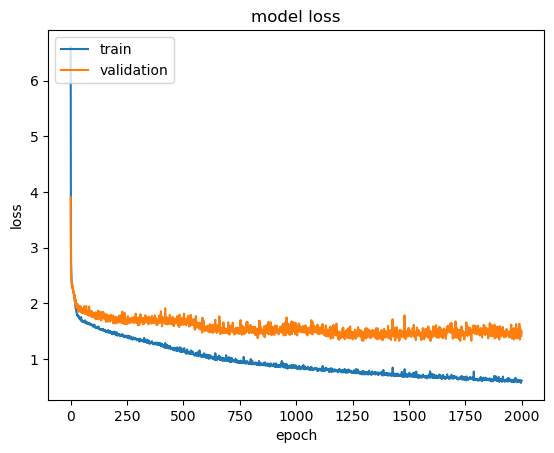

In [45]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Let's go to the other improved datasets that will lead to an increase in the performance of the model compared to this one

# Conclusion

 we also note the poor performance of the first dataset, as the neural network is very sensitive to small Datast, and this proves that three features are not sufficient to raise  the model performance .